# Analysis of Ontario's Unemployment Duration

Dataset Title: Duration of unemployment

Dataset Source: Ontario Data Catalogue

Dataset URL: https://data.ontario.ca/dataset/duration-of-unemployment/resource/8f786bb5-01ac-4e7d-b89f-3437a601941b

Data Accessed: October 19, 2023

In [1]:
# Importing py libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading dataset into a py dataframe

df = pd.read_csv('mltsd_v0906_18_tab2qq.csv')

In [3]:
# Exploratory Data Analysis

print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

     MONTH               GEOGRAPHY          DURATION  \
0  Mar2001  Total, Ontario regions  Total unemployed   
1  Mar2001  Total, Ontario regions  Total unemployed   
2  Mar2001  Total, Ontario regions  Total unemployed   
3  Mar2001  Total, Ontario regions  Total unemployed   
4  Mar2001  Total, Ontario regions  Total unemployed   

                  AGE GROUP  Both sexes   Male  Female  
0  Total, 15 years and over       398.0  229.0   169.0  
1               15-64 years       395.8  228.0   167.9  
2                     15-19        67.5   39.3    28.1  
3                     20-24        53.9   36.2    17.7  
4                     25-44       184.4  101.7    82.7  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37920 entries, 0 to 37919
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MONTH       37920 non-null  object 
 1   GEOGRAPHY   37920 non-null  object 
 2   DURATION    37920 non-null  object 
 3   AGE

C:\Users\vpop\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vpop\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vpop\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vpop\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

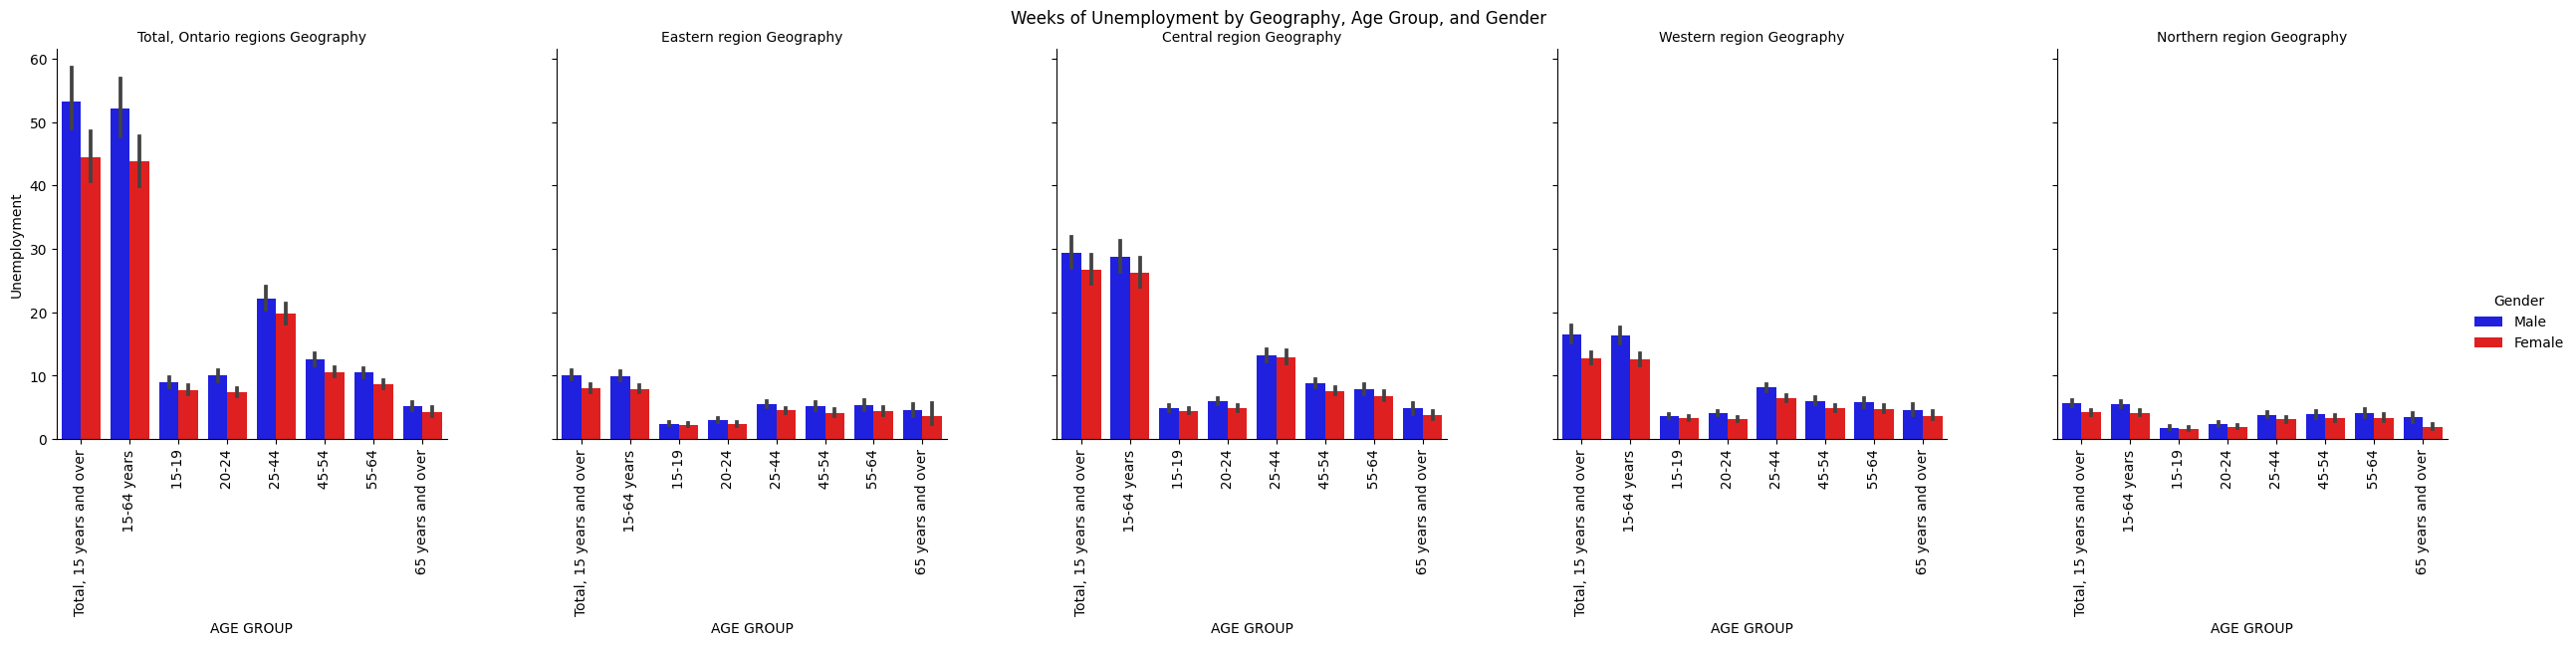

In [4]:
# Plotting Unemployment Numbers by Age Group for both Males and Females

# Melt dataframe to have a 'Gender' column
df_melted = pd.melt(df, id_vars=['MONTH', 'GEOGRAPHY', 'DURATION', 'AGE GROUP'], 
                    value_vars=['Male', 'Female'], 
                    var_name='Gender', value_name='Unemployment')

# Using catplot to visualize
g = sns.catplot(data=df_melted, x='AGE GROUP', y='Unemployment', hue='Gender', col='GEOGRAPHY', kind='bar', height=5, aspect=1, palette=['blue', 'red'])
g.set_titles("{col_name} Geography")
g.set_xticklabels(rotation=90)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Weeks of Unemployment by Geography, Age Group, and Gender')
plt.show()

In [6]:
# Transforming the Month feature into a date format as prep for a time series analysis

# Convert "MONTH" from string to datetime
df['MONTH'] = pd.to_datetime(df['MONTH'], format='%b%Y')

# Display the first few rows to verify the change
print(df.head())

       MONTH               GEOGRAPHY          DURATION  \
0 2001-03-01  Total, Ontario regions  Total unemployed   
1 2001-03-01  Total, Ontario regions  Total unemployed   
2 2001-03-01  Total, Ontario regions  Total unemployed   
3 2001-03-01  Total, Ontario regions  Total unemployed   
4 2001-03-01  Total, Ontario regions  Total unemployed   

                  AGE GROUP  Both sexes   Male  Female  
0  Total, 15 years and over       398.0  229.0   169.0  
1               15-64 years       395.8  228.0   167.9  
2                     15-19        67.5   39.3    28.1  
3                     20-24        53.9   36.2    17.7  
4                     25-44       184.4  101.7    82.7  
